# Dependcies

In [19]:
import sys
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(str(Path('.').resolve().parent))
from utils.plotting import annotate_bars

# Dataset Preparation

In [8]:
training_features = pd.read_csv('../Data/training_set_features.csv')
training_label = pd.read_csv('../Data/training_set_labels.csv')

print(training_features.shape)
print(training_label.shape)

(26707, 36)
(26707, 3)


In [9]:
# merging both dataset
merged_df = pd.merge(left= training_features, right=training_label, on ='respondent_id', how = 'inner')
print('Shape of the merged_df (row, columns):',merged_df.shape)
merged_df.head()

Shape of the merged_df (row, columns): (26707, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# Dataset Exploration

## Dataframe Summery

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

- <span style="color:blue">**Rows:**</span> 26,707  
- <span style="color:blue">**Columns:**</span> 38  
- <span style="color:blue">**Memory usage:**</span> ~7.7 MB  

---

### Column Groups with Missingness

1. **Identifiers**
- <span style="color:green">`respondent_id` — 0 missing</span>  

2. **Target Variables**
- <span style="color:green">`h1n1_vaccine` — 0 missing</span>  
- <span style="color:green">`seasonal_vaccine` — 0 missing</span>  

3. **Behavioral Features**
- <span style="color:orange">`behavioral_antiviral_meds` — 71 missing</span>  
- <span style="color:orange">`behavioral_avoidance` — 208 missing</span>  
- <span style="color:orange">`behavioral_face_mask` — 19 missing</span>  
- <span style="color:orange">`behavioral_wash_hands` — 42 missing</span>  
- <span style="color:orange">`behavioral_large_gatherings` — 87 missing</span>  
- <span style="color:orange">`behavioral_outside_home` — 82 missing</span>  
- <span style="color:orange">`behavioral_touch_face` — 128 missing</span>  

4. **Doctor Recommendations**
- <span style="color:red">`doctor_recc_h1n1` — 2,160 missing</span>  
- <span style="color:red">`doctor_recc_seasonal` — 2,160 missing</span>  

5. **Health Conditions**
- <span style="color:red">`chronic_med_condition` — 971 missing</span>  
- <span style="color:red">`child_under_6_months` — 820 missing</span>  
- <span style="color:red">`health_worker` — 804 missing</span>  
- <span style="color:red">`health_insurance` — 12,274 missing</span>  

---

### 🔎 Top 5 Columns with Highest Missingness
1. <span style="color:red">`employment_occupation` — 13,470 missing (**50.4%**)</span>  
2. <span style="color:red">`employment_industry` — 13,330 missing (**49.9%**)</span>  
3. <span style="color:red">`health_insurance` — 12,274 missing (**46.0%**)</span>  
4. <span style="color:orange">`income_poverty` — 3,423 missing (**12.8%**)</span>  
5. <span style="color:orange">`doctor_recc_h1n1` / `doctor_recc_seasonal` — 2,160 missing each (**8.1%**)</span>  

---

<div style="background-color:#008080; padding:10px; border-radius:8px; color:white; font-size:16px;">
🚨 <strong>Attention:</strong> Several columns have high missing values, so <span style="color:yellow; font-weight:bold;">careful handling of missing data</span> is necessary before analysis or modeling.
</div>




### **Numerical Features (float/int)**
`h1n1_concern`, `h1n1_knowledge`, `behavioral_antiviral_meds`, `behavioral_avoidance`, `behavioral_face_mask`, `behavioral_wash_hands`, `behavioral_large_gatherings`, `behavioral_outside_home`, `behavioral_touch_face`, `doctor_recc_h1n1`, `doctor_recc_seasonal`, `chronic_med_condition`, `child_under_6_months`, `health_worker`, `health_insurance`, `opinion_h1n1_vacc_effective`, `opinion_h1n1_risk`, `opinion_h1n1_sick_from_vacc`, `opinion_seas_vacc_effective`, `opinion_seas_risk`, `opinion_seas_sick_from_vacc`, `household_adults`, `household_children`, `h1n1_vaccine`, `seasonal_vaccine`

---

### **Categorical Features**

**Ordinal:**
`age_group`, `education`, `income_poverty`

**Nominal:**
`race`, `sex`, `marital_status`, `rent_or_own`, `employment_status`, `hhs_geo_region`, `census_msa`, `employment_industry`, `employment_occupation`


## Target Distribution

C:\Users\zhasa\AppData\Local\Temp\ipykernel_7572\3814613771.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=feature, palette=custom_palette)
C:\Users\zhasa\AppData\Local\Temp\ipykernel_7572\3814613771.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=feature, palette=custom_palette)


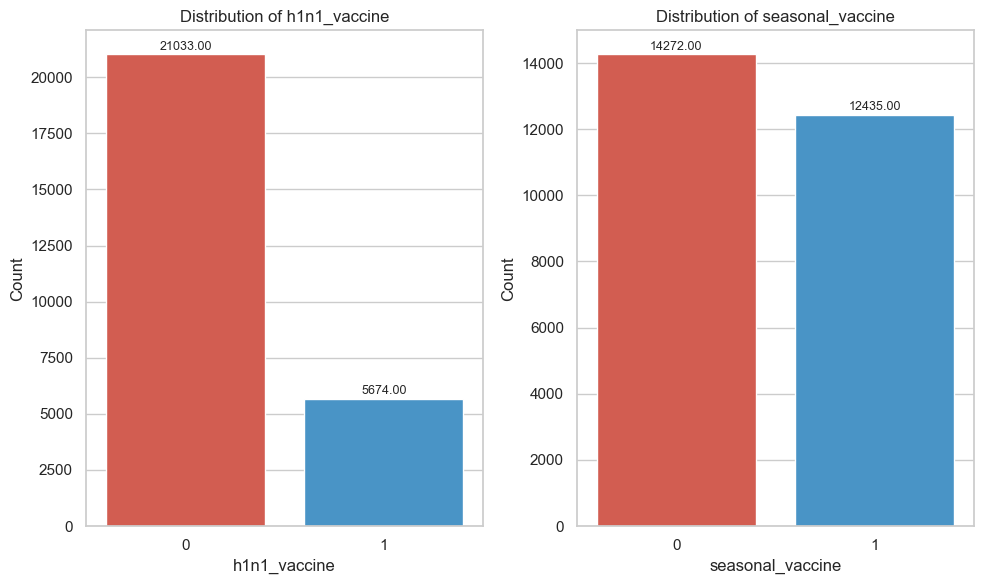

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color for each category (index 0 = value 0, index 1 = value 1)
custom_palette = ['#e74c3c', '#3498db']  # Red for 0, Blue for 1

target = ['h1n1_vaccine', 'seasonal_vaccine']
plt.figure(figsize=(10, 6))

for i, feature in enumerate(target):
    plt.subplot(1, 2, i + 1)
    
    # Now palette has 2 colors → matches 2 unique values (0 and 1)
    sns.countplot(data=merged_df, x=feature, palette=custom_palette)
    
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    annotate_bars()

plt.tight_layout()
plt.show()

### 📊 Distribution of Flu Vaccination Status

The plots above show the distribution of vaccination status for two flu types:

- **H1N1 vaccine**: ~21,033 individuals did <span style="color:red; font-weight:bold;">**not**</span> receive the vaccine (`0`), while ~5,674 did (`1`).  
  → Only about **21%** of the population received the H1N1 vaccine.  
  <span style="color:orange;">💡 Insight:</span> Uptake is low and the target is highly imbalanced, which may impact predictive modeling.

- **Seasonal flu vaccine**: ~14,272 individuals were <span style="color:red; font-weight:bold;">**not vaccinated**</span> (`0`), and ~12,435 were (`1`).  
  → Around **47%** received the seasonal flu vaccine.  
  <span style="color:orange;">💡 Insight:</span> Vaccination is closer to balanced but still shows a slight skew toward non-vaccination.

---

<div style="background-color:#008080; padding:10px; border-radius:8px; color:white; font-size:16px;">
📌 <strong>Observation:</strong> The seasonal flu vaccine has significantly higher uptake than the H1N1 vaccine, which may reflect differences in public awareness, perceived risk, or availability during the survey period. This imbalance suggests that models predicting vaccination behavior should account for class imbalance — especially for <code>h1n1_vaccine</code>, where the positive class is underrepresented. These distributions will be important when evaluating model performance and designing strategies to improve vaccination rates.
</div>



# Numarical Features Exploration

## Behavioral Features

C:\Users\zhasa\AppData\Local\Temp\ipykernel_7572\3459004692.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=feature, palette="Set2")


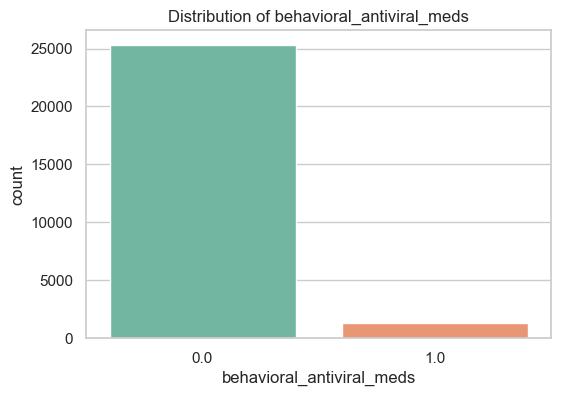

C:\Users\zhasa\AppData\Local\Temp\ipykernel_7572\3459004692.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=feature, palette="Set2")


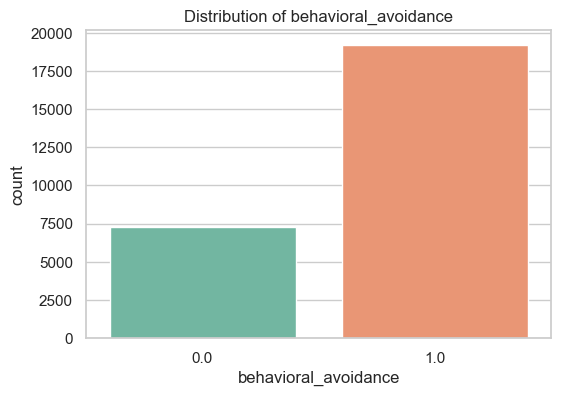

C:\Users\zhasa\AppData\Local\Temp\ipykernel_7572\3459004692.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=feature, palette="Set2")


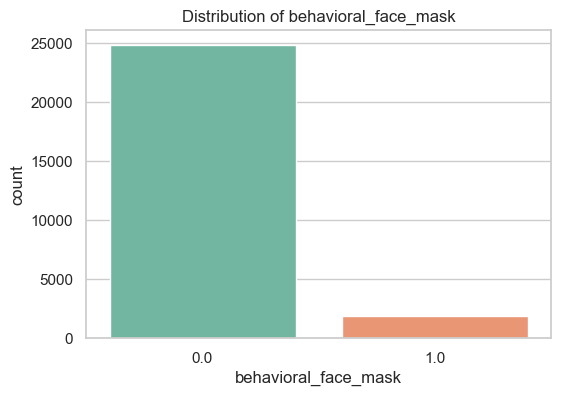

C:\Users\zhasa\AppData\Local\Temp\ipykernel_7572\3459004692.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=feature, palette="Set2")


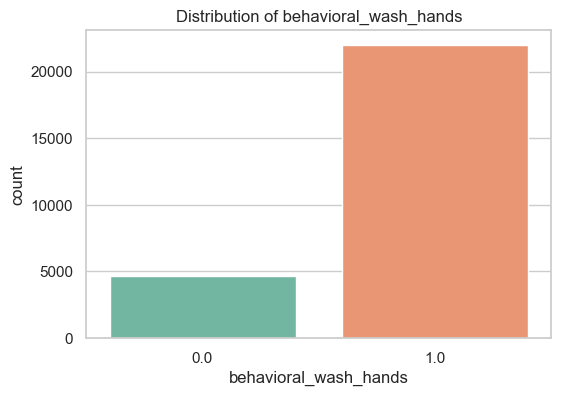

C:\Users\zhasa\AppData\Local\Temp\ipykernel_7572\3459004692.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=feature, palette="Set2")


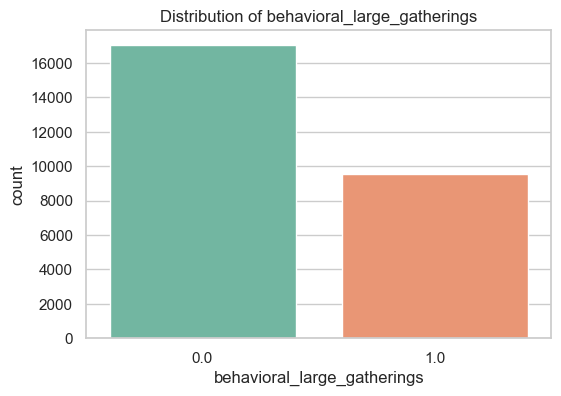

C:\Users\zhasa\AppData\Local\Temp\ipykernel_7572\3459004692.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=feature, palette="Set2")


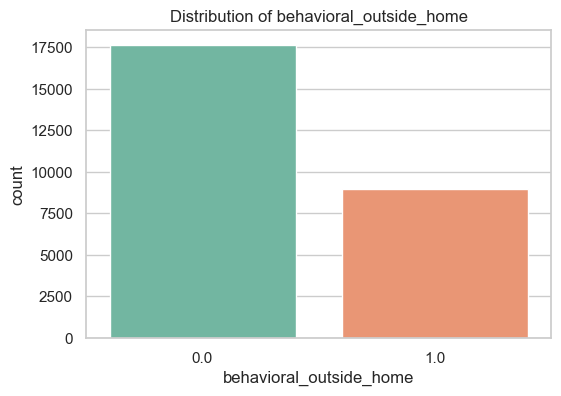

C:\Users\zhasa\AppData\Local\Temp\ipykernel_7572\3459004692.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x=feature, palette="Set2")


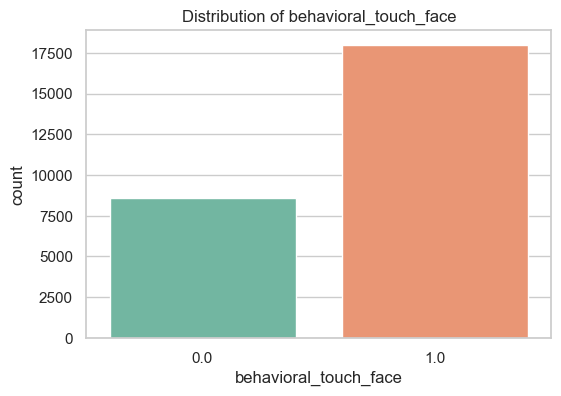

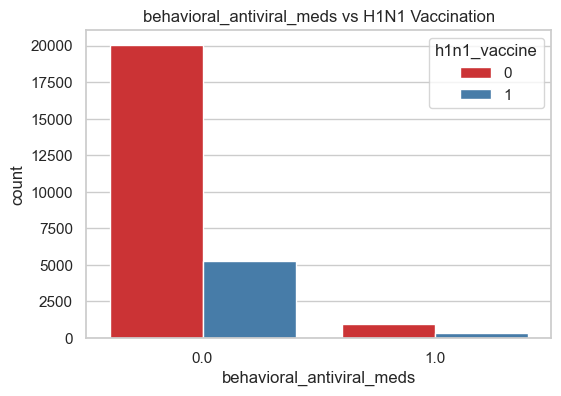

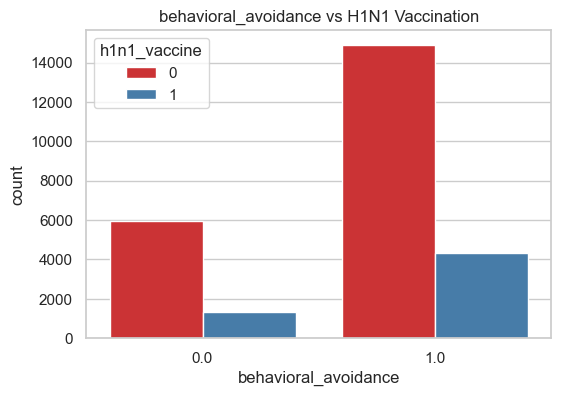

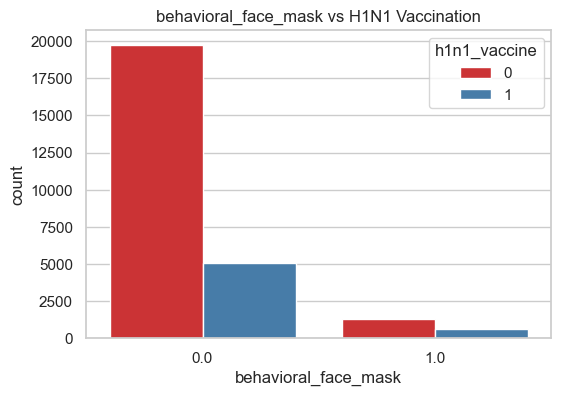

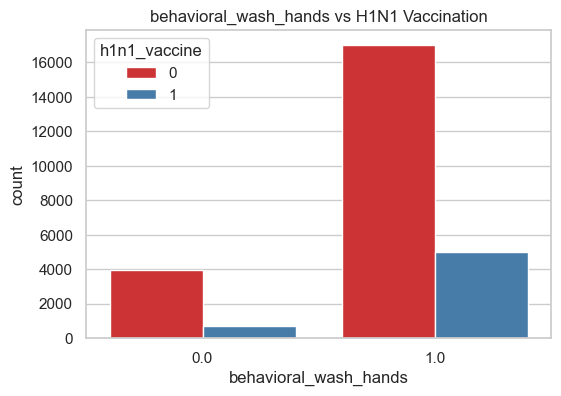

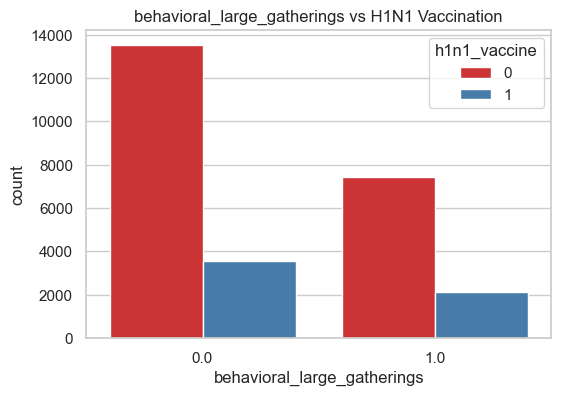

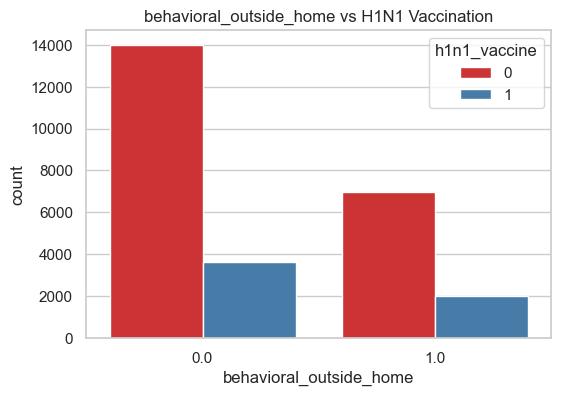

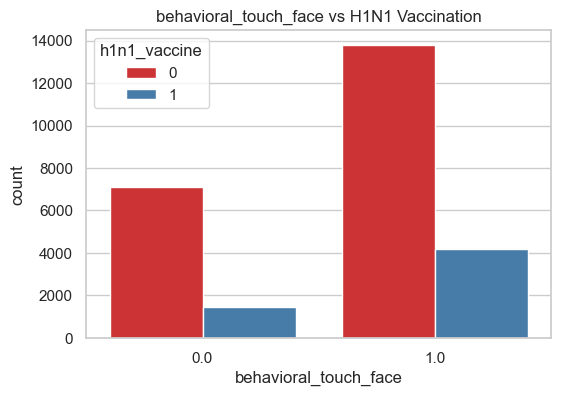

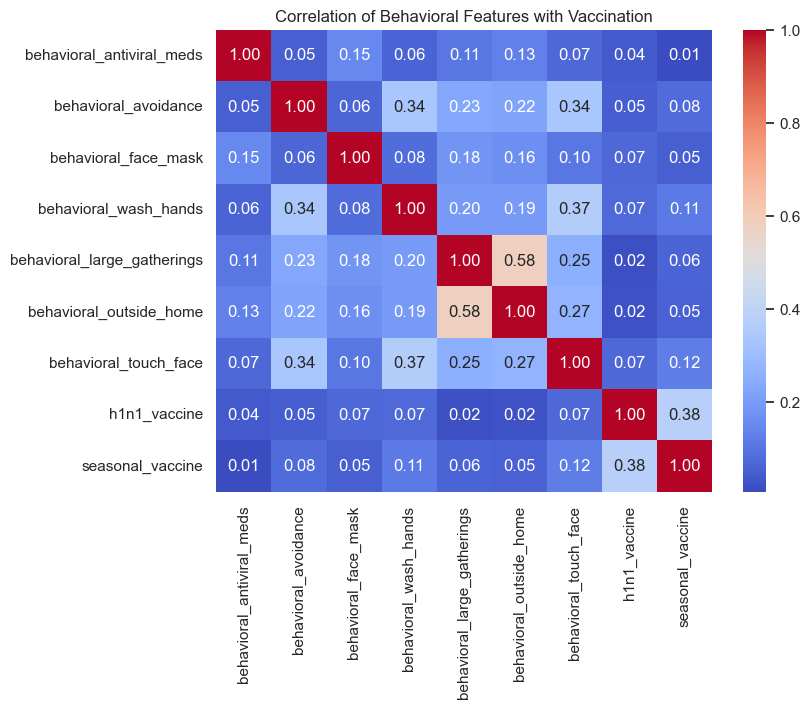

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of behavioral features
behavior_features = [
    'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
    'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face'
]

# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of each behavioral feature
for feature in behavior_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=merged_df, x=feature, palette="Set2")
    plt.title(f'Distribution of {feature}')
    plt.show()
    
# 2. Compare behavioral patterns by H1N1 vaccination
for feature in behavior_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=merged_df, x=feature, hue='h1n1_vaccine', palette="Set1")
    plt.title(f'{feature} vs H1N1 Vaccination')
    plt.show()
    
# 3. Correlation heatmap with target
corr = merged_df[behavior_features + ['h1n1_vaccine', 'seasonal_vaccine']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Behavioral Features with Vaccination")
plt.show()
